https://www.learnpytorch.io/03_pytorch_computer_vision/

# Getting started:

## What is Computer Vision

1. Binary Classification (one thing or another)
2. Multiclass Classification (more than 1 thing or another)

## What are we going to cover

* Getting a vision dataset to work with
* Architecture of a convolutional neural network(CNN) with PyTorch
* An end-to-end multi-class image classification problem
* Steps in Modeling with CNNs in PyTorch
    * Creating a CNN model with PyTorch
    * Pickinga loss and optimizer
    * Training a model
    * Evaluating a model
* identifying where a car appears in a video framme(object detection)
* figuring out wehre different objects in an image can be separated. (panoptic 展示全景的 sgmentation)

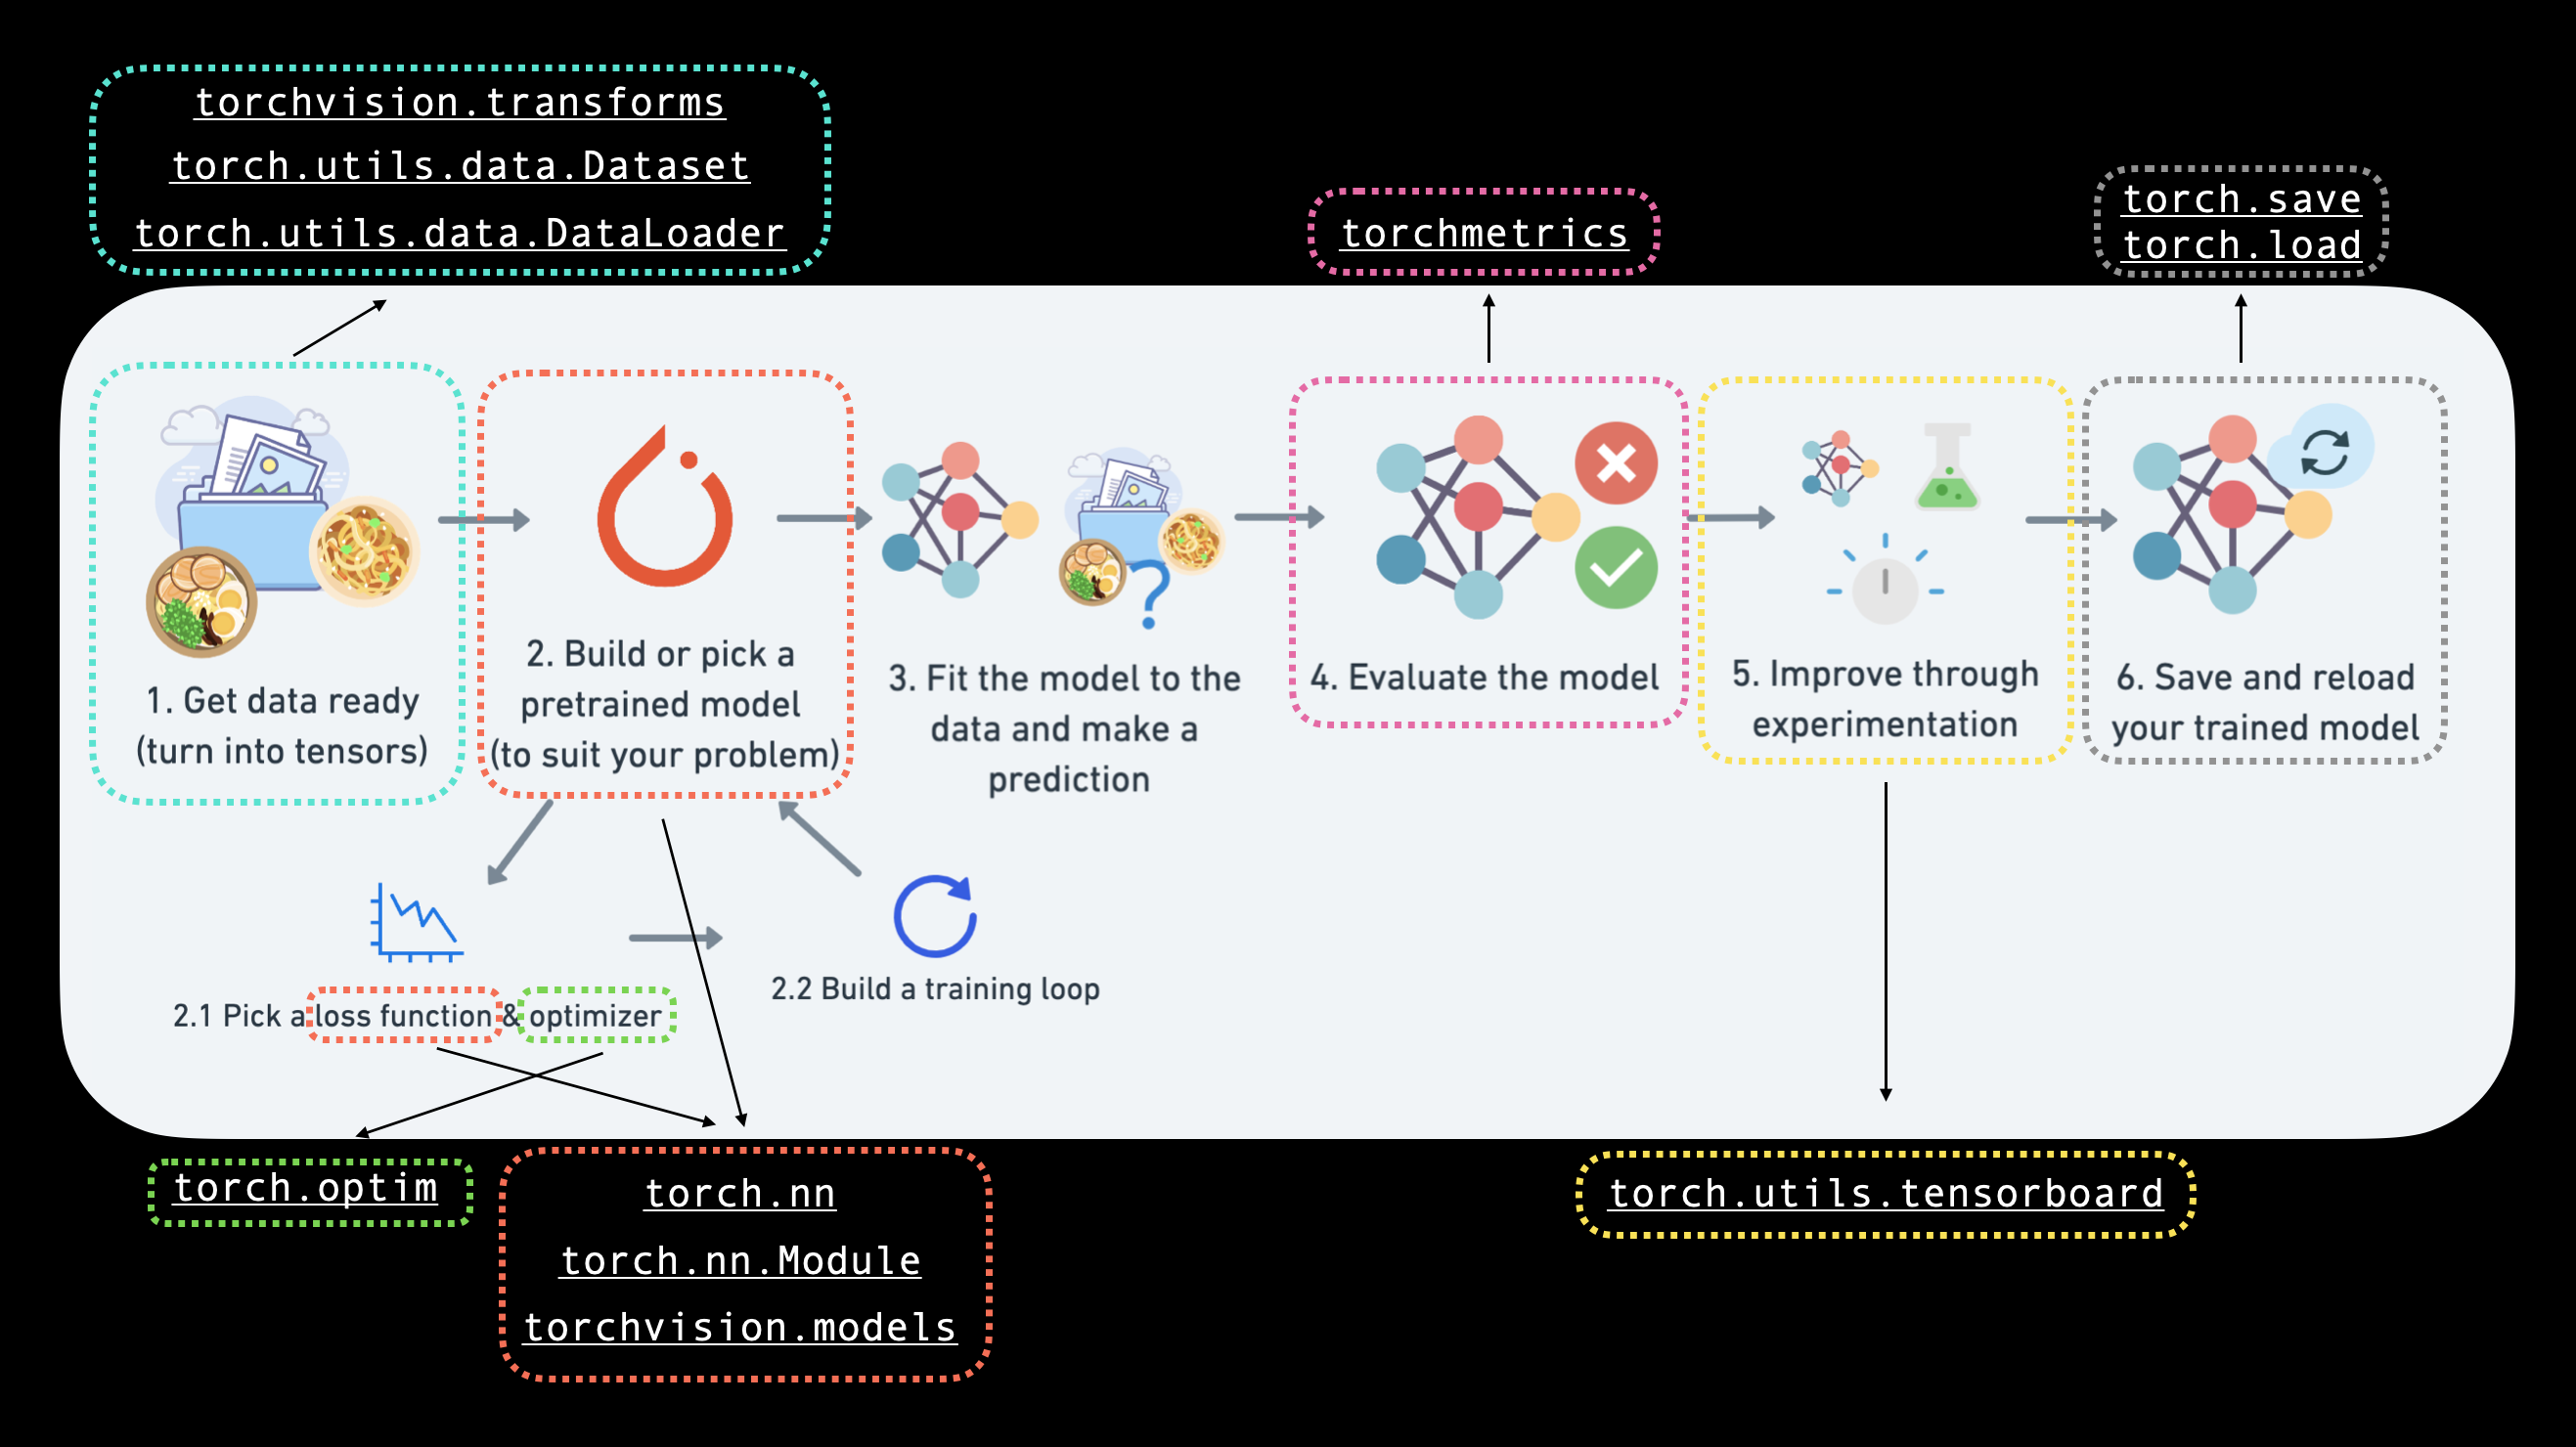

Specifically, we're going to cover:

| **Topic** | **Contents** |
| ----- | ----- |
| **0. Computer vision libraries in PyTorch** | PyTorch has a bunch of built-in helpful computer vision libraries, let's check them out.  |
| **1. Load data** | To practice computer vision, we'll start with some images of different pieces of clothing from [FashionMNIST](https://github.com/zalandoresearch/fashion-mnist). |
| **2. Prepare data** | We've got some images, let's load them in with a [PyTorch `DataLoader`](https://pytorch.org/docs/stable/data.html) so we can use them with our training loop. |
| **3. Model 0: Building a baseline model** | Here we'll create a multi-class classification model to learn patterns in the data, we'll also choose a **loss function**, **optimizer** and build a **training loop**. | 
| **4. Making predictions and evaluating model 0** | Let's make some predictions with our baseline model and evaluate them. |
| **5. Setup device agnostic code for future models** | It's best practice to write device-agnostic code, so let's set it up. |
| **6. Model 1: Adding non-linearity** | Experimenting is a large part of machine learning, let's try and improve upon our baseline model by adding non-linear layers. |
| **7. Model 2: Convolutional Neural Network (CNN)** | Time to get computer vision specific and introduce the powerful convolutional neural network architecture. |
| **8. Comparing our models** | We've built three different models, let's compare them. |
| **9. Evaluating our best model** | Let's make some predictions on random images and evaluate our best model. |
| **10. Making a confusion matrix** | A confusion matrix is a great way to evaluate a classification model, let's see how we can make one. |
| **11. Saving and loading the best performing model** | Since we might want to use our model for later, let's save it and make sure it loads back in correctly. |

## Inputs and Outputs

Inputs are usually a picture of some sorts: 
- batch_size, H x W x C(color channels - RGB) get represented as a tensor. 
- 32 is a very common batch size.

eg: Shape = [32,224,224,3]


Converts Colors to Number (Numerical Encoding) -> the inputs of the algorighm 

Outputs-> prediction probability for each case. The highest number gives you the perdicted output. 

Output Shape = [3] -> assuming 3 classes

Convolutional Neural network (CNN) is often the ML algorithm that works well with pictures. 
Transformer is also another type of algorithm that recently developped and works well with pictures.  

## The architecture of CNN

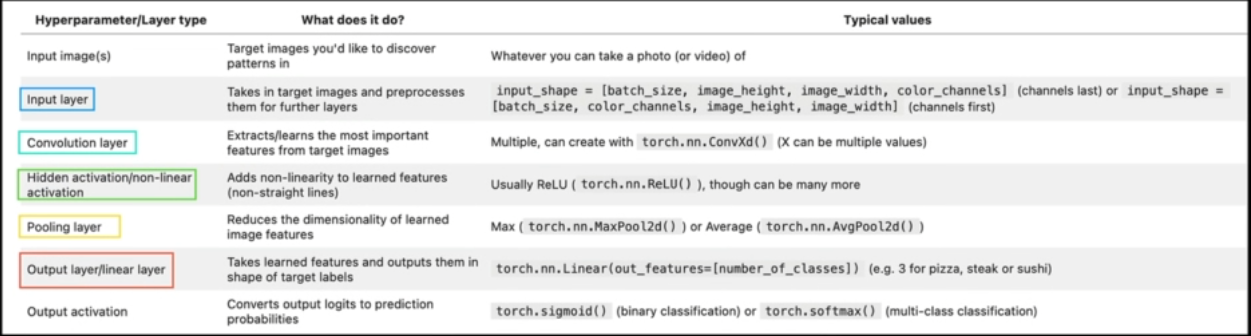

* the above architecture only represents one of the way you can stack a CNN...  

## 0. Computer vision libaries in PyTorch

* `torchvision` - base domain library for PyTorch computer vision
* `torchvision.datasets` - get datasets and data loading functions for computer vision here
* `torchvision.models` - get pretrained computer vision models (models has already been trained) that you can leverage for your own problem.
* `torchvision.transforms` - functions for manipulating your vision data(images) to be suitable for use with an ML model(eg. turn images to numbers)

* `torch.utils.data.Dataset` - base dataset class for PyTorch.
* `torch.ultils.data.DataLoader` - creates a python iterable over a dataset




In [81]:
# import PyTorch
import torch
from torch import nn

# import torchvision
import torchvision
from torchvision import transforms, datasets
from torchvision.transforms import ToTensor # converting PLT images to numpy.ndarry tensors..

#import matplotlib for visualization
import matplotlib.pyplot as plt

# check PyTorch version
print(torch.__version__)
print(torchvision.__version__)

2.10.0+cpu
0.25.0+cpu


## 1. Getting a dataset

the dataset we'll be using FashingMNIST -> MNIST,
MNIST - larget data set of handwritten digits. 

There are built-in data set under PyTorch, MNIST is one of them. 
https://docs.pytorch.org/vision/main/datasets.html


In [82]:
# Setup training data
train_data = datasets.FashionMNIST(
    root="data", # where to download the data
    train=True, # do we want training data sets or testing data sets
    download=True,
    transform=ToTensor(), # converting PLT images to numpy.ndarry tensors..
    target_transform=None # how do we want to transform the labels/targets
)

test_data = datasets.FashionMNIST(
    root="data", # where to download the data
    train=False, # do we want training data sets or testing data sets
    download=True,
    transform=ToTensor(), # converting PLT images to numpy.ndarry tensors..
    target_transform=None # how do we want to transform the labels/targets
)

### 1.1 Check input/output and other properties of our data

In [83]:
len(train_data), len(test_data)
#how many training data/test data we have


(60000, 10000)

In [84]:
# See the first training example
image,label = train_data[0]
image,label

(tensor([[[0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000],
          [0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 0.0000,
           0.0000, 0.0000, 0.0000, 0.0000, 0.0039, 0.0000, 0.0000, 0.0510,
           0.2863, 0.0000, 0.0000, 0.0039, 

In [85]:
class_names= train_data.classes
class_names

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [86]:
class_to_idx = train_data.class_to_idx
class_to_idx
# we will have output shape of 10 - 10 classes

{'T-shirt/top': 0,
 'Trouser': 1,
 'Pullover': 2,
 'Dress': 3,
 'Coat': 4,
 'Sandal': 5,
 'Shirt': 6,
 'Sneaker': 7,
 'Bag': 8,
 'Ankle boot': 9}

In [87]:
train_data.targets

tensor([9, 0, 0,  ..., 3, 0, 5])

In [88]:
# check the shape of our immage
print(f"Image shape: {image.shape}") # 1,28,28 (channels, height, width)
print(f"Label: {label}") # 9
# we can see that the image is in grayscale because it has 1 channel
# image shape is 28x28 pixels, 1 color channel

Image shape: torch.Size([1, 28, 28])
Label: 9


### 1.2 Visualizing our data

Image shape: torch.Size([1, 28, 28])


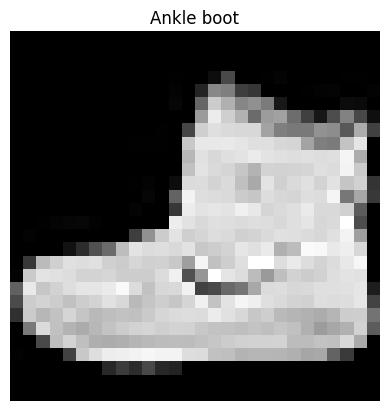

In [89]:
import matplotlib.pyplot as plt

image,label = train_data[0]
print(f"Image shape: {image.shape}")
plt.imshow(image.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False);

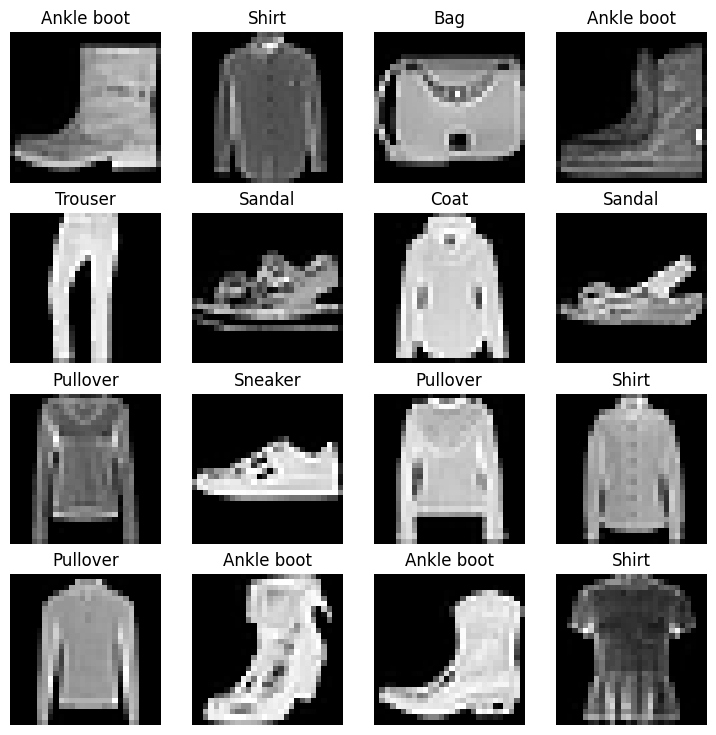

In [90]:
# Plot more images
torch.manual_seed(42)
fig = plt.figure(figsize=(9,9))
rows, cols = 4,4

for i in range(1,rows*cols +1):
    random_idx = torch.randint(0, len(train_data), size=[1]).item()
    #print(random_idx)
    img, label = train_data[random_idx]
    fig.add_subplot(rows, cols, i) # add subplot
    
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(class_names[label])
    plt.axis(False)

Do you think these items of clothing(images) could be modelled with pure linear lines? or do you think we'll need non-linearities.

## 2. Prepare Dataloader 

Right now, our data is in the form of PyTorch Datasets,

DataLoader turns our dataset into Python iterable. 
More specifically, we want to turn our data into batches(or mini-batches)

Why would we do this? 
- More efficient... when the data size gets larger, it's going to take a lot of memory/computing power from the computer to compute everything all at once. Therefore, we usually break down a larget test size into batches.  We breakdown 60000 into 32 images at a time(batch size of 32)

- It gives our neural network more chances to update its gradient per epoch. Otherwise if we are looking at all data at once, we can only update parameter once ( 1 epoch)



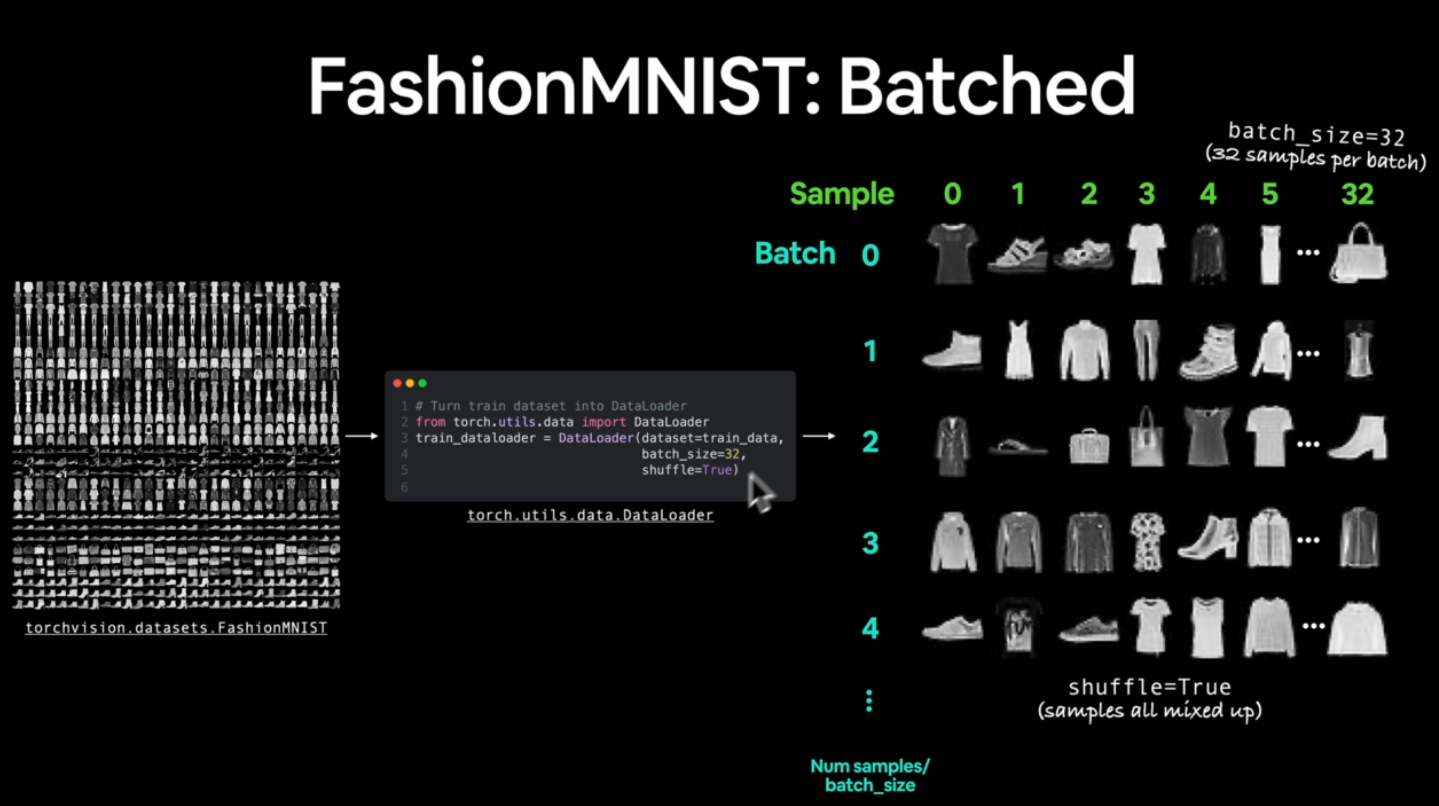

In [91]:
from torch.utils.data import DataLoader 
BATCH_SIZE = 32

# Turn datasets into iterables(batches)
train_dataloader = DataLoader(dataset=train_data,
                              batch_size=BATCH_SIZE,
                              shuffle=True) #the meaning of shuffle is such that our model doesn't learn the order.

test_dataloader = DataLoader(dataset=test_data,
                                batch_size=BATCH_SIZE,
                                shuffle=False) # you can shuffle, but testing data is usually not shuffled

train_dataloader, test_dataloader

(<torch.utils.data.dataloader.DataLoader at 0x783eb8c23e00>,
 <torch.utils.data.dataloader.DataLoader at 0x783eb830a600>)

In [92]:
# Let's check out what we have created
import test


print(f"DataLoader: {train_dataloader,test_dataloader}")
print(f"Length of the train_dataloader: {len(train_dataloader)} batches  {BATCH_SIZE}")
print(f"Length of the test_dataloader: {len(test_dataloader)} batches  {BATCH_SIZE}")

DataLoader: (<torch.utils.data.dataloader.DataLoader object at 0x783eb8c23e00>, <torch.utils.data.dataloader.DataLoader object at 0x783eb830a600>)
Length of the train_dataloader: 1875 batches  32
Length of the test_dataloader: 313 batches  32


In [93]:
# Check out what's inside the training dataload
train_features_batch, train_labels_batch = next(iter(train_dataloader)) 
train_features_batch.shape, train_labels_batch.shape

(torch.Size([32, 1, 28, 28]), torch.Size([32]))

Image size: torch.Size([1, 28, 28]), Label: 6


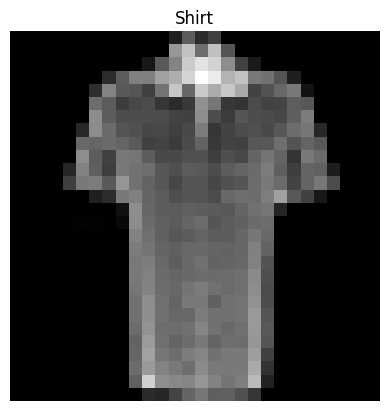

In [94]:
# Show a sample
torch.manual_seed(42)
random_idx = torch.randint(0, len(train_features_batch), size=[1]).item()
img,label = train_features_batch[random_idx], train_labels_batch[random_idx]

plt.imshow(img.squeeze(), cmap="gray")
plt.title(class_names[label])
plt.axis(False)
print(f"Image size: {img.shape}, Label: {label}")

## 3. Model 0: Build a baseline model

when starting to build a series of machine learning modleing experiments, it's best practice to start with a baseline model. 

A baseline model is a simply model you will try and improve upon with subsequent models. So we should start simple -> get complex. 

In [95]:
# Create a flatten layerrs. 
flatten_model = nn.Flatten()

# Get a single sample
x = train_features_batch[0]
x.shape # [1,28,28]

output = flatten_model(x) # flatten the image, perform forward pass

# print out what happened. 
print(f"Shape before flattening： {x.shape}")
print(f"Shape after flattening： {output.shape}")

Shape before flattening： torch.Size([1, 28, 28])
Shape after flattening： torch.Size([1, 784])


The flatten() function is useful because we want to pass in a single dimension vectors into a model that can only handle 1D input. We will see more in the later code

In [96]:
from torch import nn
class FashionMNISTModelV0(nn.Module):
    def __init__(self,input_shape = int,hidden_units = int, output_shape = int):
        super().__init__()
        self.linear_relu_stack = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=input_shape, out_features=hidden_units),
            #nn.ReLU(), comment this out to see if linearity affects the model
            nn.Linear(in_features=hidden_units, out_features=output_shape)
        )
    def forward(self,x):
        return self.linear_relu_stack(x)

In [97]:
torch.manual_seed(42)
model_0 = FashionMNISTModelV0(input_shape=28*28, #728, flattened image size
                              hidden_units=10, #how many units in the hidden layer
                              output_shape=len(class_names)).to("cpu")

In [98]:
dummy_x = torch.randn(1,1,28,28) # batch size, color channels, height, width
model_0(dummy_x) # output of 10 logics. 

tensor([[-0.2228,  0.1477,  0.3137, -0.3110, -0.3713,  0.0156,  0.4363,  0.1060,
         -0.1604, -0.4388]], grad_fn=<AddmmBackward0>)

### 3.1 set up loss, optimizer adn evaluation metrics

* Loss function - since we're working with multi-class data, our loss function will be `nn.CrossEntropyLoss()`

* Optimizer - our optimizer `torch.optim.SGD()`

* Evaluation metric - let's use accuracy as our evaliation matric

In [99]:
import requests 
from pathlib import Path

# Download helper functions script
if Path("helper_functions.py").is_file():
    print("helper_functions.py already exists, skipping download.")
else:
    print("Downloading helper_functions.py...")
    request = requests.get("https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/helper_functions.py")
    with open("helper_functions.py","wb") as f:
        f.write(request.content) 
    print("Download complete!")

helper_functions.py already exists, skipping download.


In [100]:
# import accuracy metric 
from helper_functions import accuracy_fn


In [101]:
# Setup loss function and optimizer 
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.1)



### 3.2 Creating a fucntion to time our experiements


In [102]:
from timeit import default_timer as timer
def print_train_time(start: float,
                     end: float,
                     device: torch.device = None):
    """Prints difference between start and end time."""
    total_time = end - start
    print(f"Train time on {device}: {total_time:.3f} seconds")
    return total_time

In [103]:
### example of using the timer function
start_time = timer()
end_time = timer()
print_train_time(start=start_time,
                 end=end_time,
                 device="cpu")

Train time on cpu: 0.000 seconds


3.6687999909190694e-05

### 3.3 Creating a training loop and training for data

1. Loop through epochs
2. Loop through training batches, perrform training steps, calculate the train loss
*per batch*
3. Loop through testing batches, perform testing steps, calcualte the test loss perr batch.
4. Print out what's happening.
5. Time it all out

In [104]:
# import tqdm for progress bar (a opoen-source library showing progress bar)
from tqdm.auto import tqdm

# Set the seed and start the timer
torch.manual_seed(42)
torch.cuda.manual_seed(42)
train_time_start_on_cpu = timer()

# set number of epochs
EPOCHS = 3

# Create training and test loop
for epoch in tqdm(range(EPOCHS)): # how to get tqdm to work
    ### Training
    print(f"Epoch: {epoch}\n-------")
    train_loss = 0
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(train_dataloader): # keep track of batches
        model_0.train() # put model in training mode
        # 1. Forward pass
        y_pred = model_0(X)
        # 2. Calculate loss
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the loss
        # 3. Zero gradients
        optimizer.zero_grad()
        # 4. Backward pass
        loss.backward()
        # 5. Update weights
        optimizer.step() # optimizer will step once per batch, when all batches are done, one epoch is done.
        # then in the next epoch, it will start again.
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)/len(train_dataloader.dataset)}")
    # adjust training loss to per epoch(devide total train loss by length of train data loader)
    train_loss /= len(train_dataloader)
    
    # Testing 
    test_loss, test_acc = 0,0
    model_0.eval()
    with torch.inference_mode():
        for X_test,y_test in test_dataloader:
            #forward pass
            test_pred = model_0(X_test) # just feed in X_test in testing...
            # 2. calculate the loss
            test_loss += loss_fn(test_pred,y_test)

            # 3. Calculate accuracy
            test_acc += accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
        # Test loss average per batch
        test_loss /= len(test_dataloader)
        # Test acc average per batch
        test_acc /= len(test_dataloader)
    # print out what's happening 
    print(f"\nTrain loss: {train_loss:.4f} | Test loss :{test_loss:.4f} | Test Acc :{test_acc:.4f}")

    # calculate the training time 
    train_time_end_on_cpu = timer()
    total_train_time_model_0 = print_train_time(start = train_time_start_on_cpu, end = train_time_end_on_cpu, device = str(next(model_0.parameters()).device))

    
    

  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

Train loss: 0.5904 | Test loss :0.5095 | Test Acc :82.0387
Train time on cpu: 10.346 seconds
Epoch: 1
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

Train loss: 0.4763 | Test loss :0.4799 | Test Acc :83.1969
Train time on cpu: 20.514 seconds
Epoch: 2
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334

Train loss: 0.4550 | Test loss :0.4766 | Test Acc :83.4265
Train time on cpu: 30.135 seconds


## 4. Make predictions and get Model 0 results

In [105]:
#set up divice agnostic code
import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [106]:
torch.manual_seed(42)


def eval_model(model: torch.nn.Module,
               data_loader:torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               accuracy_fn,
               device: torch.device):
    """Returning a dictionary containing the results of model predicting on data__loader"""
    loss,acc = 0 , 0 
   
    model.eval()
    with torch.inference_mode():
        for X,y in tqdm(data_loader):
            X,y = X.to(device), y.to(device)
            #Make predictions 
            y_pred = model(X)
            #Accumulate the loss and acc
            loss += loss_fn(y_pred,y)
            acc += accuracy_fn(y_true = y, y_pred=y_pred.argmax(dim=1))

        # Scale loss and acc to find theaverage loss/acc per batch 
        loss /= len(data_loader)
        acc /= len(data_loader)
    return {"model_name":model.__class__.__name__, # only work when model was created with a class, taking the attribute 
            "model_loss":loss.item(),
            "model_acc": acc}

# Calcuate model0 results on test dataset
model_0_results = eval_model(model=model_0,data_loader=test_dataloader,loss_fn=loss_fn,accuracy_fn=accuracy_fn,device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [107]:
print(model_0_results)

{'model_name': 'FashionMNISTModelV0', 'model_loss': 0.47663894295692444, 'model_acc': 83.42651757188499}


## 5. Set up device agnostic-code (for using GPU if there is one)



In [108]:
# checking if a gpu is availale 
!nvdia-smi # or 
torch.cuda.is_available()

/bin/bash: line 1: nvdia-smi: command not found


False

In [109]:
# Set up device -agnotic code 

import torch

device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

## 6. Model 1: Building a better model with non-lineaerity 

In [110]:

from torch import nn
class FashionMNISTModelV1(nn.Module):
    def __init__(self,input_shape:int,hidden_units: int, output_shape:int):
        super().__init__()
        self.layer_stack = nn.Sequential(
            nn.Flatten(), #flatten the input into single vector. 
            nn.Linear(in_features = input_shape,out_features = hidden_units), # first layer
            nn.ReLU(), #activation function
            nn.Linear(in_features = hidden_units,out_features = output_shape), #second layer 
            nn.ReLU()
        )
    def forward(self,x:torch.Tensor)-> torch.Tensor:
        return self.layer_stack(x)

In [111]:
# Create a instance of model 1. 
torch.manual_seed(42)
model_1 = FashionMNISTModelV1(input_shape=28*28,
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)
#the output shape is the length of the class names. 10 classses, then there should be 10 possibility values for each class.

next(model_1.parameters()).device  # check to see if the model is on the target device.

device(type='cpu')

### 6.1 Set up Loss/Optimizer and Evaluation metrics 

In [112]:
from helper_functions import accuracy_fn
# Setup loss function and optimizer
loss_fn = nn.CrossEntropyLoss() # calculate how wrong our model is each step
optimizer = torch.optim.SGD(params= model_1.parameters(),
                            lr=0.1) # update parameters with stochastic gradient descent

### 6.2 Functionizing training and evaluation

Let's create teh function for 
* training loop - `train_step()`
* testing loop - 

In [113]:
### Creating a function to train and test model. 

def train_step(model: torch.nn.Module,
               data_loader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer,
                device: torch.device)-> torch.nn.Module:
    """Trains a PyTorch model for one epoch."""
    #torch.manual_seed(42)
    #torch.cuda.manual_seed(42)
       
    train_loss = 0
    train_acc = 0 
    # Add a loop to loop through the training batches
    for batch, (X,y) in enumerate(data_loader): # keep track of batches
        model.train() # put model in training mode
        X,y = X.to(device), y.to(device) # send data to target device
        # 1. Forward pass (F-Fu)
        y_pred = model(X)
        # 2. Calculate loss (Lose- Le)
        loss = loss_fn(y_pred, y)
        train_loss += loss # accumulate the loss
        train_acc += accuracy_fn(y_true=y, y_pred=y_pred.argmax(dim=1))
        # 3. Zero gradients (Zero - zhe)
        optimizer.zero_grad()
        # 4. Backward pass  (Back - bang)
        loss.backward()
        # 5. Update weights (Step - Sha )
        optimizer.step() # optimizer will step once per batch, when all batches are done, one epoch is done.
        # then in the next epoch, it will start again.
        if batch % 400 == 0:
            print(f"Looked at {batch*len(X)/len(data_loader.dataset)}")
    # adjust training loss to per epoch(devide total train loss by length of train data loader)
    train_loss /= len(data_loader)
    train_acc /= len(data_loader)
    print(f"Train loss: {train_loss:.4f} | Train acc: {train_acc:.4f}")
    return model


In [114]:
def test_step(model: torch.nn.Module,
              data_loader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module,
              accuracy_fn,
              device: torch.device):
    """Tests a PyTorch model for one epoch."""
    test_loss, test_acc = 0,0
    model.eval()
    with torch.inference_mode():
        for X_test,y_test in data_loader:
            X_test, y_test = X_test.to(device), y_test.to(device)
            #forward pass
            test_pred = model(X_test)
            #loss
            loss = loss_fn(test_pred,y_test)
            test_loss += loss
            acc = accuracy_fn(y_true=y_test,y_pred=test_pred.argmax(dim=1))
            test_acc += acc
        
        # Adjust metrics and print out
        test_loss /= len(data_loader) # average test loss
        test_acc /= len(data_loader) # average test acc
        print(f"Test loss: {test_loss:.4f} | Test acc: {test_acc:.4f}")


In [115]:
# measuring time
from timeit import default_timer as timer
train_time_start_on_gpu = timer()
EPOCHS = 3

# Create a optimization and evaluation loop using train_Step() and test_step()

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-------")
    model_1 = train_step(model=model_1,
                         data_loader=train_dataloader,
                         loss_fn=loss_fn,
                         optimizer=optimizer,
                         device=device)
    test_step(model=model_1,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_1 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)

print(f"Total training time for model 1: {total_train_time_model_1:.3f} seconds")
print(f"Total training time for model 0: {total_train_time_model_0:.3f} seconds")




  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 1.0588 | Train acc: 62.1917
Test loss: 0.9951 | Test acc: 64.1274
Epoch: 1
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 0.9133 | Train acc: 66.3967
Test loss: 0.9051 | Test acc: 66.8630
Epoch: 2
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 0.8798 | Train acc: 67.2450
Test loss: 0.8949 | Test acc: 66.4736
Train time on cpu: 30.782 seconds
Total training time for model 1: 30.782 seconds
Total training time for model 0: 30.135 seconds


#### Notes

* now looking at the data, it seems like the Test Accuracy and the test loss are that much better than the model 0. Remember that model_0 is purely linear, whereas model_1 has ReLu function built in. 

* Sometimes, depending on your data, you might find that your model trains faster on CPU than GPU.
    - overhead for copying data/model to and from the GPU overweights the compute benefits offered by the GPU
    - Hardward has better CPU in terms of compute than GPU.. (rare)
    

In [116]:
# Get model_1 results dictionary

model_1_results = eval_model(model=model_1,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

  0%|          | 0/313 [00:00<?, ?it/s]

In [117]:
model_1_results

{'model_name': 'FashionMNISTModelV1',
 'model_loss': 0.8948529958724976,
 'model_acc': 66.47364217252397}

In [118]:
model_0_results

{'model_name': 'FashionMNISTModelV0',
 'model_loss': 0.47663894295692444,
 'model_acc': 83.42651757188499}

Woah, in this case, it looks like adding non-linearities to our model made it perform worse than the baseline.

That's a thing to note in machine learning, sometimes the thing you thought should work doesn't.

And then the thing you thought might not work does.

It's part science, part art.

From the looks of things, it seems like our model is overfitting on the training data.

Overfitting means our model is learning the training data well but those patterns aren't generalizing to the testing data.

Two of the main ways to fix overfitting include:

Using a smaller or different model (some models fit certain kinds of data better than others).
Using a larger dataset (the more data, the more chance a model has to learn generalizable patterns).
There are more, but I'm going to leave that as a challenge for you to explore.

Try searching online, "ways to prevent overfitting in machine learning" and see what comes up.

In the meantime, let's take a look at number 1: using a different model.

## 7. Model 2: Building a Convolutional Neural Network(CNN)

Alright, time to step things up a notch.

It's time to create a [Convolutional Neural Network](https://en.wikipedia.org/wiki/Convolutional_neural_network) (CNN or ConvNet).

CNN's are known for their capabilities to find patterns in visual data.

And since we're dealing with visual data, let's see if using a CNN model can improve upon our baseline.

The CNN model we're going to be using is known as TinyVGG from the [CNN Explainer](https://poloclub.github.io/cnn-explainer/) website.

It follows the typical structure of a convolutional neural network:

`Input layer -> [Convolutional layer -> activation layer -> pooling layer] -> Output layer`

Where the contents of `[Convolutional layer -> activation layer -> pooling layer]` can be upscaled and repeated multiple times, depending on requirements. 

> **Question:** Wait, you say CNN's are good for images, are there any other model types I should be aware of?

Good question.

This table is a good general guide for which model to use (though there are exceptions).

| **Problem type** | **Model to use (generally)** | **Code example** |
| ----- | ----- | ----- |
| Structured data (Excel spreadsheets, row and column data) | Gradient boosted models, Random Forests, XGBoost | [`sklearn.ensemble`](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.ensemble), [XGBoost library](https://xgboost.readthedocs.io/en/stable/) |
| Unstructured data (images, audio, language) | Convolutional Neural Networks, Transformers | [`torchvision.models`](https://pytorch.org/vision/stable/models.html), [HuggingFace Transformers](https://huggingface.co/docs/transformers/index) | 

> **Note:** The table above is only for reference, the model you end up using will be highly dependent on the problem you're working on and the constraints you have (amount of data, latency requirements).

Enough talking about models, let's now build a CNN that replicates the model on the [CNN Explainer website](https://poloclub.github.io/cnn-explainer/).

![TinyVGG architecture, as setup by CNN explainer website](https://raw.githubusercontent.com/mrdbourke/pytorch-deep-learning/main/images/03-cnn-explainer-model.png)

To do so, we'll leverage the [`nn.Conv2d()`](https://pytorch.org/docs/stable/generated/torch.nn.Conv2d.html) and [`nn.MaxPool2d()`](https://pytorch.org/docs/stable/generated/torch.nn.MaxPool2d.html) layers from `torch.nn`.


In [119]:
class FashionMNISTModelV2(nn.Module):
    """
    Model architecutre that replicates the TinyVGG model from CNN Explainer 
    """
    def __init__(self,input_shape:int, hidden_units:int, output_shape:int):
        super().__init__()
        self.conv_block_1 = nn.Sequential( # this is the first convolutional block
            ## its 2d because we are working with images, and we want to move in 2 dimensions (height and width)
            nn.Conv2d(in_channels = input_shape, 
                      out_channels = hidden_units,
                      kernel_size = 3, # how big is the filter
                      stride = 1, # how many pixels to move the filter each step
                      padding = 1), # how many pixels to add to the border of the image
                
            nn.ReLU(), # activation function
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2, # how big is the filter
                        stride = 2) # how many pixels to move the filter each step
        )
        self.conv_block_2 = nn.Sequential( # this is the second convolutional block
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.Conv2d(in_channels = hidden_units,
                      out_channels = hidden_units,
                      kernel_size = 3,
                      stride = 1,
                      padding = 1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size = 2,
                         stride = 2)
        )
        #At the final layer, we flatten the output and feed it into a linear layer to get the final output
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features = hidden_units*7*7, 
                      # the output of the second conv block is 7x7 feature maps with hidden_units channels
                      # the 7x7 might not be obvious and hard to calculate. 
                      # #You can print out the shape after the second conv block to see it.
                      
                      out_features = output_shape) # the final output shape

        )
    
    def forward(self,x:torch.Tensor)-> torch.Tensor:
        x = self.conv_block_1(x)
        #print(f"the shape after the first conv block: {x.shape}") # check the shape after the first conv block
        x = self.conv_block_2(x)
        #print(f"the shape after the second conv block: {x.shape}") # check the shape after the second conv block
        x = self.classifier(x)
        return x


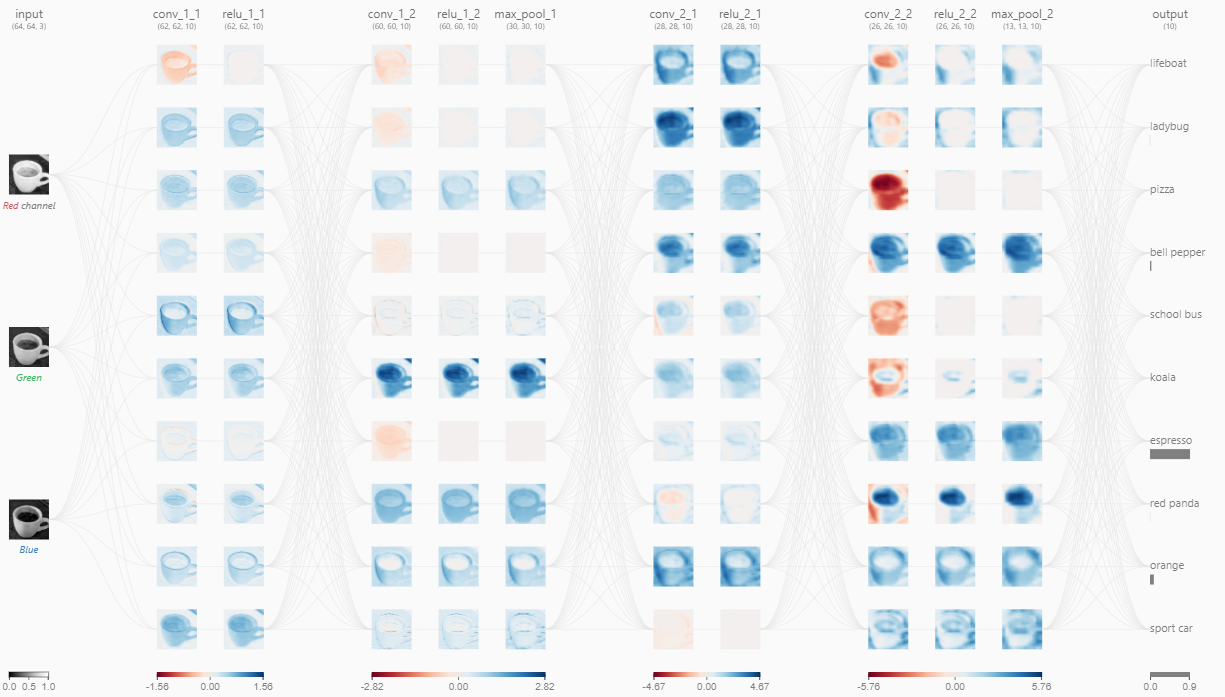

In [120]:
image.shape

torch.Size([1, 28, 28])

In [121]:
torch.manual_seed(42)
model_2 = FashionMNISTModelV2(input_shape=1, # the input shape is 1 because we are working with grayscale images
                              hidden_units=10,
                              output_shape=len(class_names)).to(device)

### 7.1 Stepping through `nn.Conv2d()`

In [122]:
torch.manual_seed(42)

# Create a batch of images

images = torch.randn(32,3,64,64) # batch size, color channels, height, width
#randn is a function that generates random numbers from a normal distribution.
test_image = images[0]

print(f"Image batch shape: {images.shape} -> individual image shape: {test_image.shape}")
test_image


Image batch shape: torch.Size([32, 3, 64, 64]) -> individual image shape: torch.Size([3, 64, 64])


tensor([[[ 1.9269,  1.4873,  0.9007,  ...,  1.8446, -1.1845,  1.3835],
         [ 1.4451,  0.8564,  2.2181,  ...,  0.3399,  0.7200,  0.4114],
         [ 1.9312,  1.0119, -1.4364,  ..., -0.5558,  0.7043,  0.7099],
         ...,
         [-0.5610, -0.4830,  0.4770,  ..., -0.2713, -0.9537, -0.6737],
         [ 0.3076, -0.1277,  0.0366,  ..., -2.0060,  0.2824, -0.8111],
         [-1.5486,  0.0485, -0.7712,  ..., -0.1403,  0.9416, -0.0118]],

        [[-0.5197,  1.8524,  1.8365,  ...,  0.8935, -1.5114, -0.8515],
         [ 2.0818,  1.0677, -1.4277,  ...,  1.6612, -2.6223, -0.4319],
         [-0.1010, -0.4388, -1.9775,  ...,  0.2106,  0.2536, -0.7318],
         ...,
         [ 0.2779,  0.7342, -0.3736,  ..., -0.4601,  0.1815,  0.1850],
         [ 0.7205, -0.2833,  0.0937,  ..., -0.1002, -2.3609,  2.2465],
         [-1.3242, -0.1973,  0.2920,  ...,  0.5409,  0.6940,  1.8563]],

        [[-0.7978,  1.0261,  1.1465,  ...,  1.2134,  0.9354, -0.0780],
         [-1.4647, -1.9571,  0.1017,  ..., -1

In [123]:
# Create a single conv2d layer and see what happens to the shape of the image as it passes through the layer.
conv_layer = nn.Conv2d(in_channels=3, # color channels
                       out_channels=10, # number of filters
                       kernel_size=3, # how big is the filter
                       stride=1, # how many pixels to move the filter each step
                       padding=1) # how many pixels to add to the border of the image


# Pass the data through the convolution layer
conv_output = conv_layer(test_image) # need unsqueenze, buecause test image is 3-dimensional (3,64,64), whereas Conv2d expects
#4 dimenison(10,3,3,3

conv_output.shape

torch.Size([10, 64, 64])

### 7.2 Stepping through `nn.MaxPool2d()


In [124]:
test_image.shape

torch.Size([3, 64, 64])

In [125]:
# Print out the original image shape and the unsqueezed dimension
print(f"Original image shape: {test_image.shape}")
print(f"Test image with unsqueezed batch dimension: {test_image.unsqueeze(0).shape}")

Original image shape: torch.Size([3, 64, 64])
Test image with unsqueezed batch dimension: torch.Size([1, 3, 64, 64])


In [126]:
# Create a sample nn.MaxPool2d layer
max_pool_layer = nn.MaxPool2d(kernel_size=2, stride=1)

#Pass through the conv_layer first
conv_output = conv_layer(test_image.unsqueeze(0)) # add batch dimension
print(f"Shape after convolution: {conv_output.shape}")
# Pass through the max pool layer
max_pool_output = max_pool_layer(conv_output)
print(f"Shape after max pooling: {max_pool_output.shape}")



Shape after convolution: torch.Size([1, 10, 64, 64])
Shape after max pooling: torch.Size([1, 10, 63, 63])


可以看到...test_image 从原来的 1x3x64x64 经过convolution 后得到的是1x10x64x64. convolution将3channel(r,g,b) 拆分成10个nuerons.

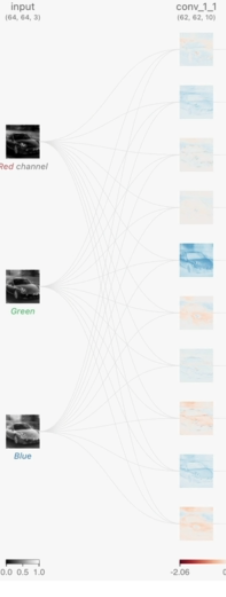

接下来 max pooling 将每4个cell 转化成一个cell. 卷积过后得到32x32.

接下来用更简单的tensor来看看尺寸的变化

In [127]:
random_tensor = torch.rand(1,1,2,2)
print(f"Random tensor:\n{random_tensor}")
print(f"Shape of random tensor: {random_tensor.shape}"
      )
max_pool_layer = nn.MaxPool2d(kernel_size=2)
max_pool_tensor = max_pool_layer(random_tensor)
print(f"\nMax Pool Tensor:\n{max_pool_tensor}")
print(f"Shape after max pooling: {max_pool_tensor.shape}")


Random tensor:
tensor([[[[0.8752, 0.8225],
          [0.0145, 0.2480]]]])
Shape of random tensor: torch.Size([1, 1, 2, 2])

Max Pool Tensor:
tensor([[[[0.8752]]]])
Shape after max pooling: torch.Size([1, 1, 1, 1])


#### 7.2.2 Passing a image through the model and exam the tensors shape

torch.Size([1, 28, 28])

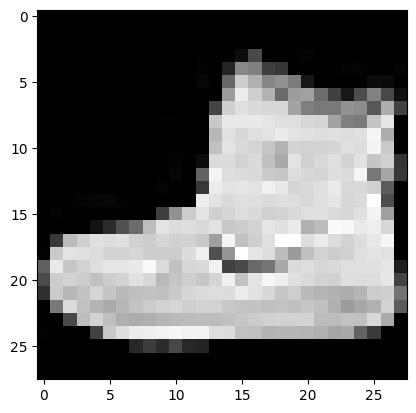

In [128]:
plt.imshow(image.squeeze(), cmap="gray")
image.shape

In [129]:
# Passing a image through the model
model_2(image.unsqueeze(0))

tensor([[ 0.0246, -0.0644,  0.0551, -0.0360, -0.0139,  0.0113, -0.0014, -0.0075,
          0.0213,  0.0076]], grad_fn=<AddmmBackward0>)

### 7.3 Training our first CNN network

In [130]:
# Setup Loss function/eval metrics/optimizer
torch.manual_seed(42)
torch.cuda.manual_seed(42)


from helper_functions import accuracy_fn
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model_2.parameters(),
                            lr=0.1)

from timeit import default_timer as timer
train_time_start_on_gpu = timer()
EPOCHS = 3

# Create a optimization and evaluation loop using train_Step() and test_step()

for epoch in tqdm(range(EPOCHS)):
    print(f"Epoch: {epoch}\n-------")
    model_2 = train_step(model=model_2,
                         data_loader=train_dataloader,
                         loss_fn=loss_fn,
                         optimizer=optimizer,
                         device=device)
    test_step(model=model_2,
              data_loader=test_dataloader,
              loss_fn=loss_fn,
              accuracy_fn=accuracy_fn,
              device=device)

train_time_end_on_gpu = timer()
total_train_time_model_2 = print_train_time(start=train_time_start_on_gpu,
                                              end=train_time_end_on_gpu,
                                              device=device)

print(f"Total training time for model 2: {total_train_time_model_2:.3f} seconds")
print(f"Total training time for model 1: {total_train_time_model_1:.3f} seconds")
print(f"Total training time for model 0: {total_train_time_model_0:.3f} seconds")



  0%|          | 0/3 [00:00<?, ?it/s]

Epoch: 0
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 0.5952 | Train acc: 78.3750
Test loss: 0.3950 | Test acc: 85.9924
Epoch: 1
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 0.3654 | Train acc: 86.9017
Test loss: 0.3524 | Test acc: 86.9109
Epoch: 2
-------
Looked at 0.0
Looked at 0.21333333333333335
Looked at 0.4266666666666667
Looked at 0.64
Looked at 0.8533333333333334
Train loss: 0.3259 | Train acc: 88.1283
Test loss: 0.3272 | Test acc: 88.0691
Train time on cpu: 166.606 seconds
Total training time for model 2: 166.606 seconds
Total training time for model 1: 30.782 seconds
Total training time for model 0: 30.135 seconds


In [131]:
# Get model_2 results dictionary

from pyexpat import model


model_2_results = eval_model(model=model_2,
                             data_loader=test_dataloader,
                             loss_fn=loss_fn,
                             accuracy_fn=accuracy_fn,
                             device=device)

model_2_results

  0%|          | 0/313 [00:00<?, ?it/s]

{'model_name': 'FashionMNISTModelV2',
 'model_loss': 0.32718968391418457,
 'model_acc': 88.06908945686901}

## 8. Compare model results and training time

In [132]:
import pandas as pd

compare_results = pd.DataFrame([model_0_results, model_1_results, model_2_results])
compare_results

,model_name,model_loss,model_acc
0,FashionMNISTModelV0,0.476639,83.426518
1,FashionMNISTModelV1,0.894853,66.473642
2,FashionMNISTModelV2,0.327190,88.069089


In [133]:
### adding training time to results comparison
compare_results["training_time"] = [total_train_time_model_0, total_train_time_model_1, total_train_time_model_2]
compare_results

,model_name,model_loss,model_acc,training_time
0,FashionMNISTModelV0,0.476639,83.426518,30.134638
1,FashionMNISTModelV1,0.894853,66.473642,30.782161
2,FashionMNISTModelV2,0.327190,88.069089,166.606062


Text(0, 0.5, 'model')

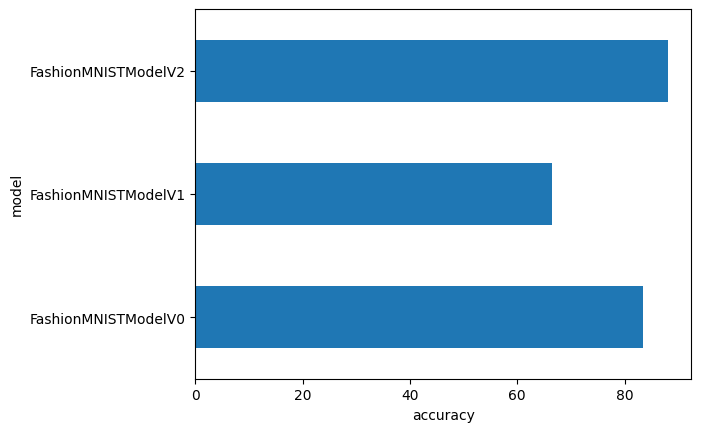

In [134]:
# visualize the comparison results
compare_results.set_index("model_name")["model_acc"].plot(kind="barh")
plt.xlabel("accuracy")
plt.ylabel("model")

## 9. Make and evaluate random predictions with the best model

In [135]:
def make_predition(model:torch.nn.Module,
                   data:list,
                   device: torch.device = device):
    """Takes a trained model, list of data and a device and makes predicitons on the data using the model."""
    pred_probs = []
    model.eval() # put model in evaluation mode for making predictions.
    with torch.inference_mode():
        for sample in data:
            sample = torch.unsqueeze(sample, dim=0).to(device) # add batch dimension and send to target device
            #forward pass(model outputs: raw logits)
            pred = model(sample) 
            pred_logit = model(sample)
            pred_prob = torch.softmax(pred_logit.squeeze(0), dim=0) # convert logits to prediciton probabilities

            #Get pred_prob off the GPU for further calculations and append to list(matpotlib can't plot tensors on GPU)
            pred_probs.append(pred_prob.cpu())
    return torch.stack(pred_probs) # stack list of pred probs into a tensor


In [136]:
img,label = test_data[0][:10] 
img.shape, label

(torch.Size([1, 28, 28]), 9)

Text(0.5, 1.0, 'Pullover')

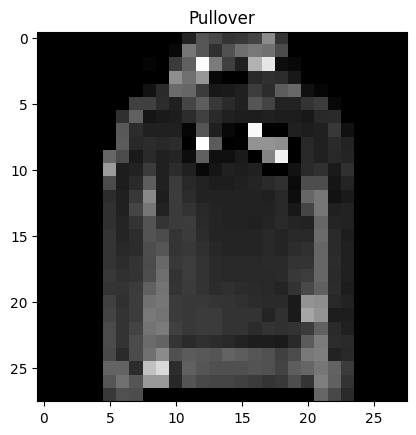

In [137]:
import random
#random.seed(42)

test_samples = []
test_labels = []

for sample, label in random.sample(list(test_data), k=9):
    test_samples.append(sample)
    test_labels.append(label)
#View the first sample
test_samples[0].shape

plt.imshow(test_samples[0].squeeze(), cmap="gray")
plt.title(class_names[test_labels[0]])

In [138]:
#Make predictions
pred_probs = make_predition(model=model_2, data=test_samples, device=device)
# view the first two predictions probabilities
#convert pred_probs to label
pred_classes = pred_probs.argmax(dim=1)
pred_classes

tensor([2, 4, 6, 3, 2, 2, 0, 1, 1])

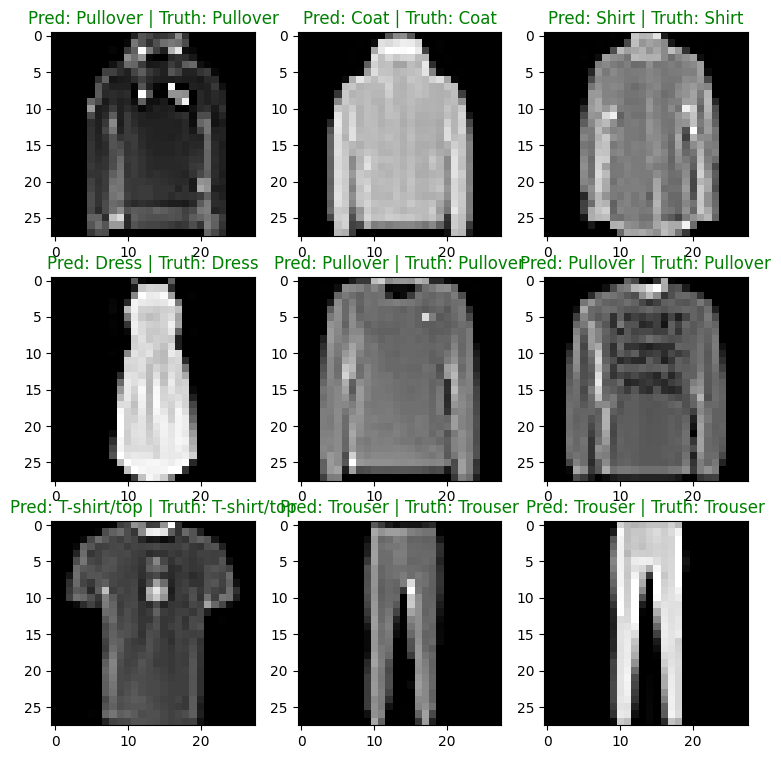

In [139]:
#plot prediction

plt.figure(figsize=(9,9))
nrows, ncols = 3,3

for i, sample in enumerate(test_samples):
    plt.subplot(nrows, ncols, i+1)
    #plot target image
    plt.imshow(sample.squeeze(), cmap="gray")
    # find the target label
    target_label = class_names[pred_classes[i]]
    # find the truth label
    truth_label = class_names[test_labels[i]]
    plt.title(f"Pred: {target_label} | Truth: {truth_label}")
    #Check for equality between pred and truth and set title color accordingly
    if target_label == truth_label:
        plt.title(f"Pred: {target_label} | Truth: {truth_label}", color="green")
    else:
        plt.title(f"Pred: {target_label} | Truth: {truth_label}", color="red")

## 10. Making a confusion matrix for further evaluation

A confusion matrix is a fantastic way of evaluating your classification models visually.

1. Make predictions with our trained model on the test dataset 
2. TorchMetrics is a great way to make confusion metrix
https://lightning.ai/docs/torchmetrics/stable/
3. Plot the confusion matrix using mlxtend plot (great resourse of ploting confusion matrix)
https://rasbt.github.io/mlxtend/


In [140]:
from tqdm.auto import tqdm 


# 1. Make predictions with trained model
y_preds = []
model_2.eval()
with torch.inference_mode():
    for X,y in tqdm(test_dataloader, desc="Making predictions..."):
        X,y = X.to(device), y.to(device)
        y_logit = model_2(X)
        #turn logits to pred probs
        y_pred = torch.softmax(y_logit, dim=1).argmax(dim=1)
        y_preds.append(y_pred.to("cpu"))
print(y_preds)
y_pred_tensor = torch.cat(y_preds)
y_pred_tensor.shape
len(y_pred_tensor)


Making predictions...:   0%|          | 0/313 [00:00<?, ?it/s]

[tensor([9, 2, 1, 1, 6, 1, 4, 6, 5, 7, 4, 5, 5, 3, 4, 1, 2, 4, 8, 0, 2, 7, 7, 5,
        1, 2, 6, 0, 9, 3, 8, 8]), tensor([3, 3, 8, 0, 7, 5, 7, 9, 0, 1, 0, 7, 6, 7, 2, 1, 4, 6, 4, 6, 5, 8, 2, 2,
        8, 4, 8, 0, 7, 7, 8, 5]), tensor([1, 1, 4, 3, 7, 8, 7, 0, 2, 6, 2, 3, 1, 2, 8, 4, 1, 8, 5, 9, 5, 0, 3, 2,
        0, 2, 5, 3, 6, 7, 1, 8]), tensor([0, 1, 4, 2, 3, 6, 7, 6, 7, 8, 5, 7, 9, 4, 2, 5, 7, 0, 5, 2, 8, 6, 7, 8,
        0, 0, 9, 9, 3, 0, 8, 4]), tensor([1, 5, 4, 1, 9, 1, 8, 6, 6, 1, 2, 5, 1, 0, 0, 0, 1, 6, 1, 3, 2, 2, 2, 4,
        1, 3, 5, 0, 4, 7, 9, 3]), tensor([7, 2, 3, 9, 0, 9, 4, 7, 4, 2, 0, 5, 4, 1, 2, 1, 3, 0, 9, 1, 0, 9, 3, 6,
        7, 9, 9, 4, 4, 7, 1, 2]), tensor([3, 6, 3, 6, 8, 3, 6, 1, 1, 0, 2, 9, 2, 4, 0, 7, 9, 8, 4, 1, 8, 4, 1, 3,
        1, 6, 7, 2, 8, 5, 6, 0]), tensor([7, 7, 6, 6, 7, 0, 7, 8, 9, 2, 9, 0, 5, 1, 4, 2, 5, 4, 9, 2, 4, 8, 6, 4,
        6, 4, 9, 7, 6, 5, 5, 4]), tensor([8, 5, 2, 3, 0, 4, 8, 0, 0, 6, 3, 8, 9, 6, 1, 3, 0, 2, 3, 0, 8, 3, 7, 4,
       

10000

In [3]:
!pip install mlxtend


In [4]:
!pip install "numpy<2"


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 5.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 89.1 MB/s eta 0:00:00:00:0100:01
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
jax 0.7.2 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
pytensor 2.37.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
shap 0.50.0 requires numpy>=2, but you have numpy 1.26.4 which is incompatible.
tobler 0.13.0 requires numpy>=2.0, but you have numpy 1.26.4 which is incompatible.
opencv-contrib-python 4.13.0.92 requires numpy>=2; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.
opencv-python 4.13.0.92 requires numpy>=2; python_ve

In [6]:
from torchmetrics import ConfusionMatrix
from mlxtend.plotting import plot_confusion_matrix

# 2. Setup confusion matrix instance and compare predictions to targets
confmat = ConfusionMatrix(num_classes=len(class_names), task='multiclass')
confmat_tensor = confmat(preds=y_pred_tensor,
                         target=test_data.targets)

# 3. Plot the confusion matrix
fig, ax = plot_confusion_matrix(
    conf_mat=confmat_tensor.numpy(), # matplotlib likes working with NumPy 
    class_names=class_names, # turn the row and column labels into class names
    figsize=(10, 7)
);

ModuleNotFoundError: No module named 'torchmetrics'

The confusion matrix is not working..... will paste answer from notebook


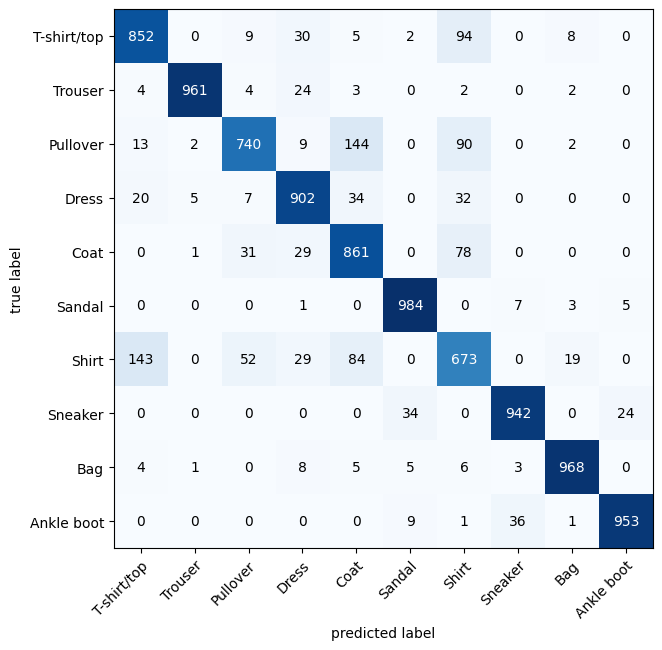

Woah! Doesn't that look good?

We can see our model does fairly well since most of the dark squares are down the diagonal from top left to bottom right (and ideal model will have only values in these squares and 0 everywhere else).

The model gets most "confused" on classes that are similar, for example predicting "Pullover" for images that are actually labelled "Shirt".

And the same for predicting "Shirt" for classes that are actually labelled "T-shirt/top".

This kind of information is often more helpful than a single accuracy metric because it tells use *where* a model is getting things wrong.

It also hints at *why* the model may be getting certain things wrong.

It's understandable the model sometimes predicts "Shirt" for images labelled "T-shirt/top".

We can use this kind of information to further inspect our models and data to see how it could be improved.

> **Exercise:** Use the trained `model_2` to make predictions on the test FashionMNIST dataset. Then plot some predictions where the model was wrong alongside what the label of the image should've been. After visualizing these predictions do you think it's more of a modelling error or a data error? As in, could the model do better or are the labels of the data too close to each other (e.g. a "Shirt" label is too close to "T-shirt/top")?

## 11. Save and load best performing model

Let's finish this section off by saving and loading in our best performing model.

Recall from notebook 01 we can save and load a PyTorch model using a combination of:

torch.save - a function to save a whole PyTorch model or a model's state_dict().
torch.load - a function to load in a saved PyTorch object.
torch.nn.Module.load_state_dict() - a function to load a saved state_dict() into an existing model instance.
You can see more of these three in the PyTorch saving and loading models documentation.

For now, let's save our model_2's state_dict() then load it back in and evaluate it to make sure the save and load went correctly.

In [ ]:
from pathlib import Path

# Create models directory (if it doesn't already exist), see: https://docs.python.org/3/library/pathlib.html#pathlib.Path.mkdir
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, # create parent directories if needed
                 exist_ok=True # if models directory already exists, don't error
)

# Create model save path
MODEL_NAME = "03_pytorch_computer_vision_model_2.pth"
MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME

# Save the model state dict
print(f"Saving model to: {MODEL_SAVE_PATH}")
torch.save(obj=model_2.state_dict(), # only saving the state_dict() only saves the learned parameters
           f=MODEL_SAVE_PATH)

Now we've got a saved model `state_dict()` we can load it back in using a combination of `load_state_dict()` and `torch.load()`.

Since we're using `load_state_dict()`, we'll need to create a new instance of `FashionMNISTModelV2()` with the same input parameters as our saved model `state_dict()`.

In [7]:
# Create a new instance of FashionMNISTModelV2 (the same class as our saved state_dict())
# Note: loading model will error if the shapes here aren't the same as the saved version
loaded_model_2 = FashionMNISTModelV2(input_shape=1, 
                                    hidden_units=10, # try changing this to 128 and seeing what happens 
                                    output_shape=10) 

# Load in the saved state_dict()
loaded_model_2.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

# Send model to GPU
loaded_model_2 = loaded_model_2.to(device)

# Evaluate loaded model
torch.manual_seed(42)

loaded_model_2_results = eval_model(
    model=loaded_model_2,
    data_loader=test_dataloader,
    loss_fn=loss_fn, 
    accuracy_fn=accuracy_fn
)

loaded_model_2_results

# Check to see if results are close to each other (if they are very far away, there may be an error)
torch.isclose(torch.tensor(model_2_results["model_loss"]), 
              torch.tensor(loaded_model_2_results["model_loss"]),
              atol=1e-08, # absolute tolerance
              rtol=0.0001) # relative tolerance

NameError: name 'FashionMNISTModelV2' is not defined